In [6]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize
from standard_plotting import set_size

In [7]:
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/"

In [8]:
# indir_db_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
# with sql.connect(indir_db_MC) as con:
#         query = f"""
#         SELECT
#             event_no, interaction_type, pid
#         FROM 
#             truth
#         """
#         MC_interaction_type = read_sql(query,con)

#outdir_interaction_type = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
#MC_interaction_type = pd.read_csv(outdir_interaction_type + 'interaction_type_New_muon_test.csv')

In [9]:
#indir_multiclass_old = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/trained_models/osc_next_level3_v2/dynedge_pid_classification3_test/results.csv"
indir_multiclass_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/pid_Multiclass_try_2_on_test_new_muon.csv"
#indir_track_cascade = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_energy_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/energy_New_muon_test_set_inc_truth.csv"
indir_zenith_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/zenith_New_muon_test_set.csv"
indir_azimuth_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/azimuth_New_muon_test_set.csv"
indir_retro = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Retro/retro_on_new_muon_test_set.csv"
indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/pid_Burnsample_RD_Full_db_new_muon.csv"

In [10]:

#track_cascade_MC = pd.read_csv(indir_track_cascade_MC).sort_values('event_no').reset_index(drop = True)
energy_MC = pd.read_csv(indir_energy_MC).sort_values('event_no').reset_index(drop = True)
zenith_MC = pd.read_csv(indir_zenith_MC).sort_values('event_no').reset_index(drop = True)
azimuth_MC = pd.read_csv(indir_azimuth_MC).sort_values('event_no').reset_index(drop = True)
multiclass_MC = pd.read_csv(indir_multiclass_MC).sort_values('event_no').reset_index(drop = True)
retro = pd.read_csv(indir_retro).sort_values('event_no').reset_index(drop = True)
multiclass_RD = pd.read_csv(indir_multiclass_RD).sort_values('event_no').reset_index(drop = True)

In [11]:
# safe_load_place_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/logit/Neutrino_prob_logit_MC.csv"
# load_logit_MC = True
# if load_logit_MC:
#     input = pd.read_csv(safe_load_place_MC)
#     multiclass_MC['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']

# safe_load_place_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Neutrino_prob_logit_RD.csv"
# load_logit_RD = True
# if load_logit_RD:
#     input = pd.read_csv(safe_load_place_RD)
#     multiclass_RD['pid_neutrino_pred_logit'] = input['pid_neutrino_pred']
def to_logit(p):
    eps = 0.0000001
    try:
        if np.isnan(p):
            return
        p = p*(1-2*eps)+eps
        logit = np.log(p/(1-p))
    except ZeroDivisionError as e:
        print(e)
    return logit

safe_load_place_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/logit/Neutrino_prob_logit_MC.csv"
load_logit_MC = False
if load_logit_MC:
    input = pd.read_csv(safe_load_place_MC)
    multiclass_MC['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
else:
    multiclass_MC['pid_neutrino_pred_logit'] = pd.Series(multiclass_MC['pid_neutrino_pred']).apply(to_logit)
    multiclass_MC['pid_neutrino_pred_logit'].to_csv(safe_load_place_MC)




safe_load_place_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/event_selections/Neutrino_prob_logit_RD.csv"
load_logit_RD = False
if load_logit_RD:
    input = pd.read_csv(safe_load_place_RD)
    multiclass_RD['pid_neutrino_pred_logit'] = input['pid_neutrino_pred']
else:
    multiclass_RD['pid_neutrino_pred_logit'] = pd.Series(multiclass_RD['pid_neutrino_pred']).apply(to_logit)
    multiclass_RD['pid_neutrino_pred_logit'].to_csv(safe_load_place_RD)

In [12]:
indir_osc_weight_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/osc_weights_new_muon.csv"
osc_weight_MC = pd.read_csv(indir_osc_weight_MC)
print(len(osc_weight_MC))
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])
osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])

38885781
          event_no  osc_weight
28956376  28956376         NaN


/tmp/ipykernel_679/382299087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0


          event_no  osc_weight
28956376  28956376         0.0


In [13]:
nr_electron_neutrino_i3_files = 602
nr_muon_neutrino_i3_files = 1518
nr_tau_neutrino_i3_files = 334
nr_muon_i3_files = 1093
nr_noise_i3_files = 401

nr_electron_neutrinos_total = 8118575 + 183333
nr_muon_neutrinos_total = 19923619 + 183333
nr_tau_neutrinos_total = 8702748 + 183333
nr_muon_total = 169737 + 550000
nr_noise_total = 321103 + 550000

nr_electron_neutrinos_test = 8118575
nr_muon_neutrinos_test = 19923619
nr_tau_neutrinos_test = 8702748
nr_muon_test = 169737
nr_noise_test =321103

electron_neutrino_add_weight = 1/(nr_electron_neutrino_i3_files*nr_electron_neutrinos_test/nr_electron_neutrinos_total)
muon_neutrino_add_weight = 1/(nr_muon_neutrino_i3_files*nr_muon_neutrinos_test/nr_muon_neutrinos_total)
tau_neutrino_add_weight = 1/(nr_tau_neutrino_i3_files*nr_tau_neutrinos_test/nr_tau_neutrinos_total)
muon_add_weight = 1/(nr_muon_i3_files*nr_muon_test/nr_muon_total)
noise_add_weight = 1/(nr_noise_i3_files*nr_noise_test/nr_noise_total)
print(electron_neutrino_add_weight,muon_neutrino_add_weight,tau_neutrino_add_weight)

electron_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12))].to_list()
muon_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-14,14))].to_list()
tau_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-16,16))].to_list()
muon_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-13,13))].to_list()
noise_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-1,1))].to_list()
neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))].to_list()

print(osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight
print(osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_event_nos))] *= muon_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((noise_event_nos))] *= noise_add_weight

0.001698641060838674 0.0006648233149566109 0.0030570841456206404
878    1.375828e-07
890    2.086777e-07
904    1.883566e-07
916    2.064462e-07
930    1.458803e-07
932    1.216562e-07
938    3.205147e-07
945    2.292233e-07
946    2.398221e-07
956    1.527254e-07
Name: osc_weight, dtype: float64


/tmp/ipykernel_679/3908699960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight


878    2.337037e-10
890    3.544685e-10
904    3.199503e-10
916    3.506780e-10
930    2.477983e-10
932    2.066502e-10
938    5.444394e-10
945    3.893682e-10
946    4.073716e-10
956    2.594257e-10
Name: osc_weight, dtype: float64


/tmp/ipykernel_679/3908699960.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
/tmp/ipykernel_679/3908699960.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
/tmp/ipykernel_679/3908699960.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [14]:
#track_cascade_MC = pd.merge(track_cascade_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
energy_MC = pd.merge(energy_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
zenith_MC = pd.merge(zenith_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
azimuth_MC = pd.merge(azimuth_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
multiclass_MC = pd.merge(multiclass_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)

In [15]:
print(len(multiclass_MC[multiclass_MC['pid'].isin((-1,1))]))

321103


In [16]:
# nr_electron_neutrino_i3_files = 602
# nr_muon_neutrino_i3_files = 1518
# nr_tau_neutrino_i3_files = 334
# nr_muon_i3_files = 1093
# nr_noise_i3_files = 401

# nr_electron_neutrinos_total = 8118575 + 183333
# nr_muon_neutrinos_total = 19923619 + 183333
# nr_tau_neutrinos_total = 8702748 + 183333
# nr_muon_total = 169737 + 550000
# nr_noise_total = 321103 + 550000

# nr_electron_neutrinos_test = 8118575
# nr_muon_neutrinos_test = 19923619
# nr_tau_neutrinos_test = 8702748
# nr_muon_test = 169737
# nr_noise_test =321103

# electron_neutrino_add_weight = 1/(nr_electron_neutrino_i3_files*nr_electron_neutrinos_test/nr_electron_neutrinos_total)
# muon_neutrino_add_weight = 1/(nr_muon_neutrino_i3_files*nr_muon_neutrinos_test/nr_muon_neutrinos_total)
# tau_neutrino_add_weight = 1/(nr_tau_neutrino_i3_files*nr_tau_neutrinos_test/nr_tau_neutrinos_total)
# muon_add_weight = 1/(nr_muon_i3_files*nr_muon_test/nr_muon_total)
# noise_add_weight = 1/(nr_noise_i3_files*nr_noise_test/nr_noise_total)
# print(electron_neutrino_add_weight,muon_neutrino_add_weight,tau_neutrino_add_weight)

# electron_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12))].to_list()
# muon_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-14,14))].to_list()
# tau_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-16,16))].to_list()
# muon_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-13,13))].to_list()
# noise_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-1,1))].to_list()
# neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))].to_list()

# print(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight
# print(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((muon_event_nos))] *= muon_add_weight
# multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin((noise_event_nos))] *= noise_add_weight

In [17]:
Burnsample_weight = 1/(365.2425*24*3600*10*0.01)

multiclass_RD['osc_weight'] = np.ones(len(multiclass_RD))*Burnsample_weight 

In [18]:
neutrino_cut = 12
pure_selection_MC_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-12,12,-14,14,-16,16)))]
pure_selection_MC_electron_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-12,12)))]
pure_selection_MC_muon_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-14,14)))]
pure_selection_MC_tau_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-16,16)))]
pure_selection_MC_noise = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-1,1)))]
pure_selection_MC_muons = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-13,13)))]
pure_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit']>neutrino_cut]

In [19]:
print('this is the number of muons surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the number of noise surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the number of neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the number of electron neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the number of muon neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the number of tau neutrinos surviving',len(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the rate of muons surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
print('this is the rate of noise surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
print('this is the rate of neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print('this is the rate of electron neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
print('this is the rate of muon neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
print('this is the rate of tau neutrinos surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))

print('this is the RD rate that survives:',np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_selection_RD.to_list())]))

this is the number of muons surviving 4
this is the number of noise surviving 0
this is the number of neutrinos surviving 12669619
this is the number of electron neutrinos surviving 2923503
this is the number of muon neutrinos surviving 6517475
this is the number of tau neutrinos surviving 3228641
this is the rate of muons surviving 6.682139306877526e-05
this is the rate of noise surviving 0.0
this is the rate of neutrinos surviving 0.002825976038016856
this is the rate of electron neutrinos surviving 0.0005733016923178883
this is the rate of muon neutrinos surviving 0.002140844420342449
this is the rate of tau neutrinos surviving 0.0001118299253565169
this is the RD rate that survives: 0.00577558948025145


In [20]:

noise_rates = []
muon_rates = []
neutrino_rates = []
electron_neutrino_rates = []
muon_neutrino_rates = []
tau_neutrino_rates = []
RD_rates = []

cuts = np.linspace(-17,16,34)
for i in range(len(cuts)):
    neutrino_cut = cuts[i]
    pure_selection_MC_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-12,12,-14,14,-16,16)))]
    pure_selection_MC_electron_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-12,12)))]
    pure_selection_MC_muon_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-14,14)))]
    pure_selection_MC_tau_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-16,16)))]
    pure_selection_MC_noise = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-1,1)))]
    pure_selection_MC_muons = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-13,13)))]
    pure_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit']>neutrino_cut]

    muon_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muons.to_list())]))
    noise_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_noise.to_list())]))
    neutrino_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
    electron_neutrino_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_electron_neutrinos.to_list())]))
    muon_neutrino_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_muon_neutrinos.to_list())]))
    tau_neutrino_rates.append(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_tau_neutrinos.to_list())]))
    RD_rates.append(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_selection_RD.to_list())]))

    

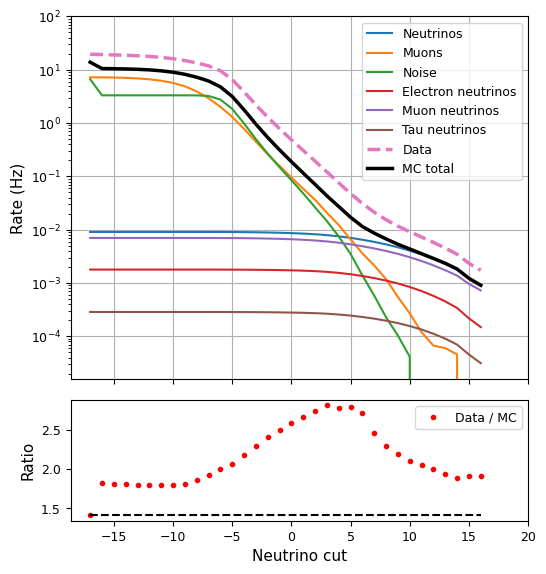

In [40]:
figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 0.85
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])


axs[0].plot(cuts,neutrino_rates,label='Neutrinos',)
axs[0].plot(cuts,muon_rates,label='Muons')
axs[0].plot(cuts,noise_rates,label='Noise')
axs[0].plot(cuts,electron_neutrino_rates,label='Electron neutrinos')
axs[0].plot(cuts,muon_neutrino_rates,label='Muon neutrinos')
axs[0].plot(cuts,tau_neutrino_rates,label='Tau neutrinos')
axs[0].plot(cuts,RD_rates,label='Data',linewidth=2.5,linestyle='dashed')
axs[0].plot(cuts,np.array(neutrino_rates)+np.array(muon_rates)+np.array(noise_rates),label='MC total',color='k',linewidth=2.5)
axs[0].set_ylabel('Rate (Hz)')
axs[1].set_xlabel('Neutrino cut')
axs[0].set_yscale('log')
axs[0].set_xlim(right=20)
axs[0].set_ylim(top=100)
axs[0].legend()
axs[0].grid(True)

RD_MC_ratio = RD_rates/(np.array(neutrino_rates)+np.array(muon_rates)+np.array(noise_rates))
axs[1].set_ylabel('Ratio')
axs[1].plot(cuts,RD_MC_ratio,'.',color='red',label='Data / MC')
axs[1].hlines(RD_MC_ratio[0],np.min(cuts)-0.02,np.max(cuts)+0.02,color='k',linestyles='dashed')
axs[1].legend()
fig.tight_layout()

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/"
fig.savefig(outdir+ 'MC_vs_retro_selection_all_long_2.png', format='png', bbox_inches='tight')

In [41]:
print(np.sum(multiclass_MC['osc_weight']))
print(np.sum(multiclass_RD['osc_weight']))
print(np.sum(multiclass_RD['osc_weight'])/np.sum(multiclass_MC['osc_weight']))
print(np.min(multiclass_MC['pid_neutrino_pred_logit']))

13.86618689685948
19.56458342364642
1.4109562758077028
-16.118095550958316


In [23]:
print(retro.columns)

Index(['L7_oscNext_bool', 'EventID', 'RunID', 'SubEventID', 'SubrunID',
       'azimuth_retro', 'azimuth_sigma', 'cascade_energy_retro',
       'energy_retro', 'energy_sigma', 'osc_weight', 'position_x_retro',
       'position_x_sigma', 'position_y_retro', 'position_y_sigma',
       'position_z_retro', 'position_z_sigma', 'time_retro', 'time_sigma',
       'track_energy_retro', 'track_length_retro', 'zenith_retro',
       'zenith_sigma', 'event_no'],
      dtype='object')


In [24]:
print(len(retro['osc_weight'][retro['L7_oscNext_bool']==1]))
print(len(retro['osc_weight'][retro['L7_oscNext_bool']==0]))
retro = retro[(retro['event_no'].isin(multiclass_MC['event_no']))&(retro['L7_oscNext_bool']==1)]
print(len(retro['osc_weight'][retro['L7_oscNext_bool']==1]))
print(len(retro['osc_weight'][retro['L7_oscNext_bool']==0]))

8130763
628
8010438
0


In [25]:
neutrino_cut = 12
pure_selection_MC_neutrinos = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit']>neutrino_cut) & (multiclass_MC['pid'].isin((-12,12,-14,14,-16,16)))]
print(len(pure_selection_MC_neutrinos))

12669619


In [26]:
same = pd.merge(pure_selection_MC_neutrinos,retro,on='event_no',how='inner')
only_retro_event_nos = retro['event_no'][~retro['event_no'].isin(same['event_no'])]
only_our_selection_event_nos = multiclass_MC['event_no'][(~multiclass_MC['event_no'].isin(same['event_no']))&(multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list()))]

In [27]:
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(retro['event_no'])]))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos)]))

0.002018927521289245
0.002825976038016856


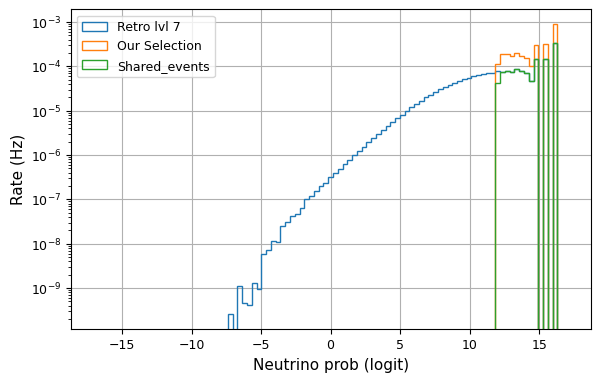

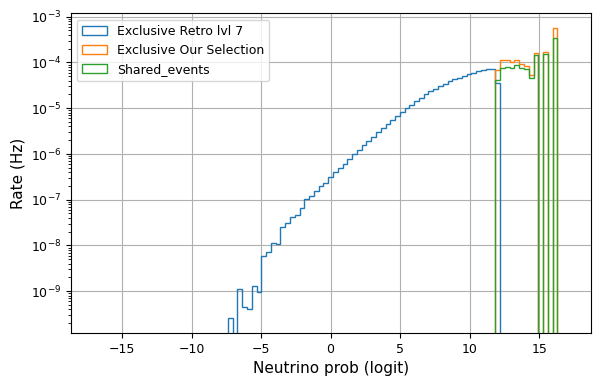

In [28]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-17,17,100)
plt.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(retro['event_no'].to_list())],weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],label='Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(same['event_no'].to_list())],weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(same['event_no'].to_list())],label='Shared_events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Neutrino prob (logit)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_neutrino_prob_logit.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-17,17,100)
plt.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(only_retro_event_nos.to_list())],weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(only_our_selection_event_nos.to_list())],weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['event_no'].isin(same['event_no'].to_list())],weights=multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(same['event_no'].to_list())],label='Shared_events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Neutrino prob (logit)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_neutrino_prob_logit_exclusive.png', format='png', bbox_inches='tight')

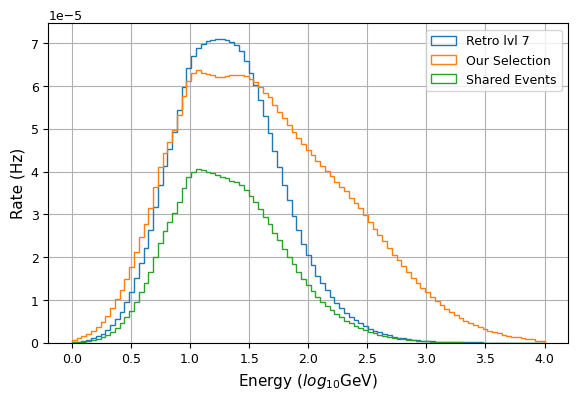

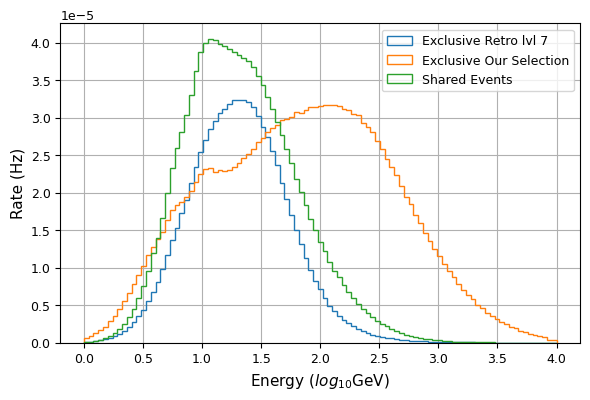

In [29]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,4,100)
plt.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(retro['event_no'].to_list())]),weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]),weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],label='Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(same['event_no'].to_list())]),weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel(r'Energy ($log_{10}$GeV)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_energy.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,4,100)
plt.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(only_retro_event_nos)]),weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(only_our_selection_event_nos.to_list())]),weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(same['event_no'].to_list())]),weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel(r'Energy ($log_{10}$GeV)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)

outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_energy_exclusive.png', format='png', bbox_inches='tight')

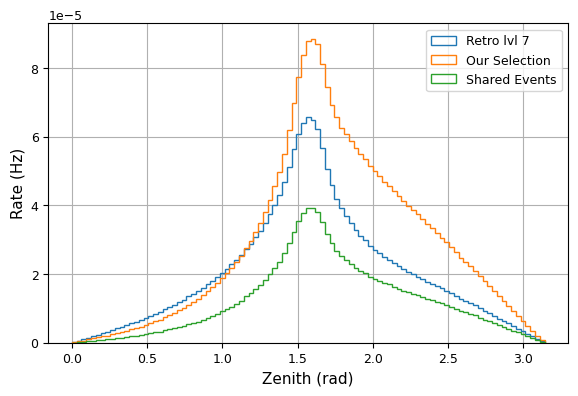

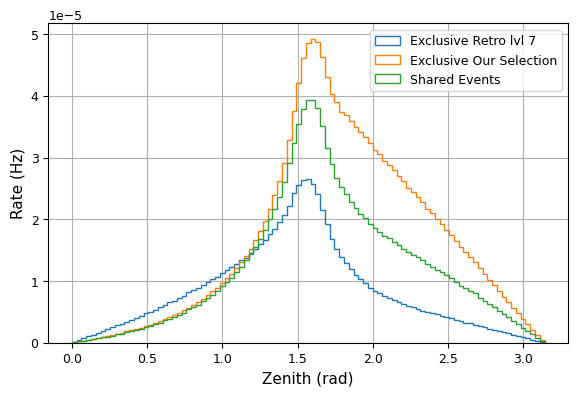

In [30]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(retro['event_no'].to_list())],weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],label='Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(same['event_no'].to_list())],weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Zenith (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_zenith.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(only_retro_event_nos.to_list())],weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(only_our_selection_event_nos.to_list())],weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(same['event_no'].to_list())],weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Zenith (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_zenith_exclusive.png', format='png', bbox_inches='tight')

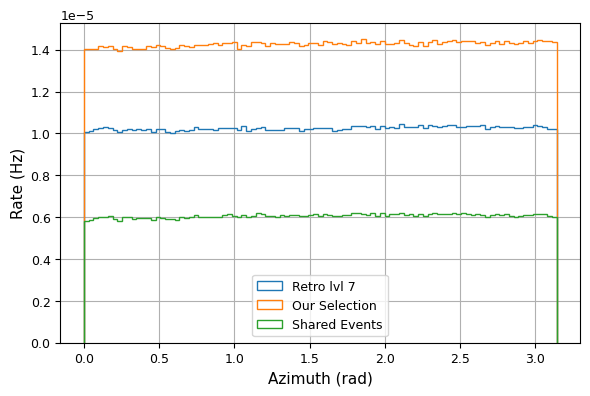

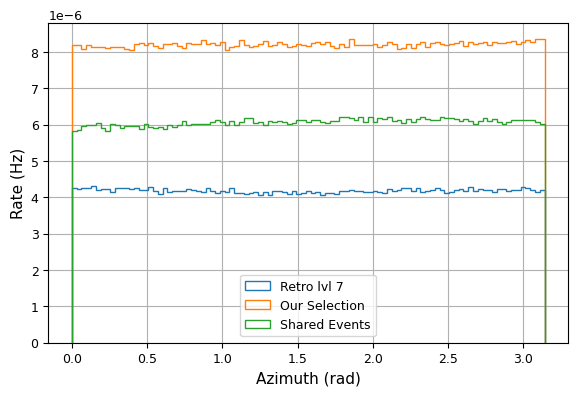

In [31]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(retro['event_no'].to_list())],weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],label='Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(same['event_no'].to_list())],weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Azimuth (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_azimuth.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(0,np.pi,100)
plt.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(only_retro_event_nos.to_list())],weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(only_retro_event_nos.to_list())],label='Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(only_our_selection_event_nos.to_list())],weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(same['event_no'].to_list())],weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('Azimuth (rad)')
#axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_azimuth_exclusive.png', format='png', bbox_inches='tight')


#outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/"
#fig.savefig(outdir+ 'MC_vs_retro_selection_all_long.png', format='png', bbox_inches='tight')

In [32]:
# indir_db_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/osc_next_database_new_muons_peter/Merged_db/osc_next_level3_v2.00_genie_muongun_noise_120000_140000_160000_139008_888003_retro.db"
# with sql.connect(indir_db_MC) as con:
#         query = f"""
#         SELECT
#             event_no, position_x, position_y, position_z
#         FROM 
#             truth
#         """
#         MC_Positions = read_sql(query,con)
# not_saved = False
# if not_saved:
#     save_positions_dir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
#     MC_Positions.to_csv(save_positions_dir+'vertex_pos_new_muon.csv',index=False)


In [33]:
save_positions_dir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/"
positions_MC = pd.read_csv("/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/only_truth_vertex_pos_new_muon.csv")
positions_MC = pd.merge(positions_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)

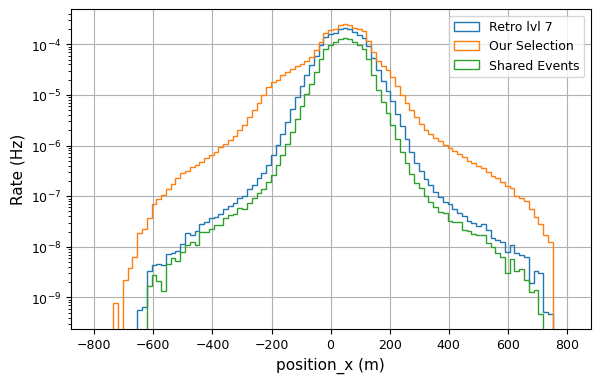

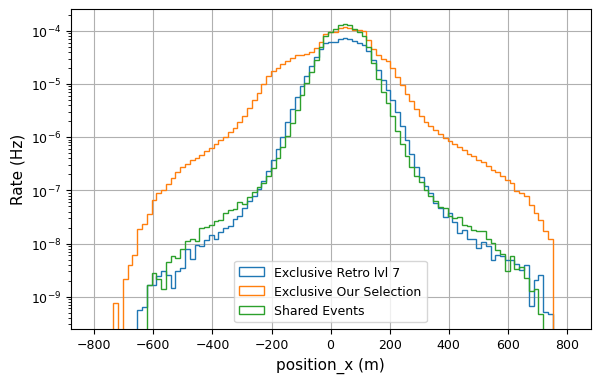

In [34]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(positions_MC['position_x'][positions_MC['event_no'].isin(retro['event_no'].to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_x'][positions_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],label='Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_x'][positions_MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_x (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posx.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(positions_MC['position_x'][positions_MC['event_no'].isin(only_retro_event_nos.to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_x'][positions_MC['event_no'].isin(only_our_selection_event_nos.to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_x'][positions_MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_x (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posx_exclusive.png', format='png', bbox_inches='tight')

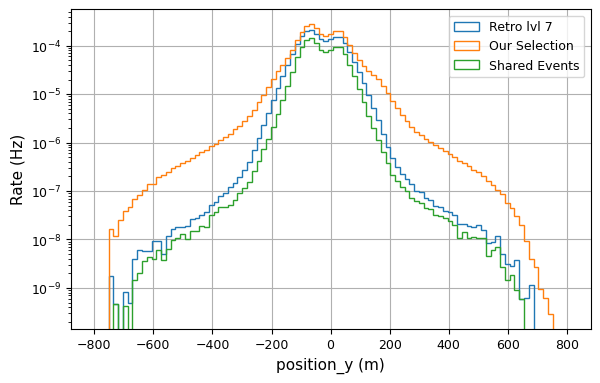

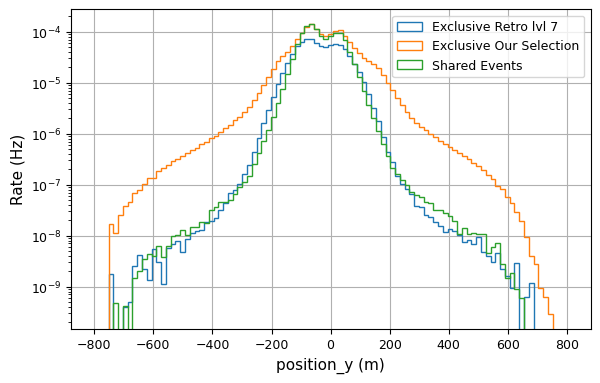

In [35]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(positions_MC['position_y'][positions_MC['event_no'].isin(retro['event_no'].to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_y'][positions_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],label='Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_y'][positions_MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_y (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posy.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-800,800,100)
plt.hist(np.clip(positions_MC['position_y'][positions_MC['event_no'].isin(only_retro_event_nos.to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_y'][positions_MC['event_no'].isin(only_our_selection_event_nos.to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_y'][positions_MC['event_no'].isin(same['event_no'].to_list())],-750,750),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_y (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posy_exclusive.png', format='png', bbox_inches='tight')

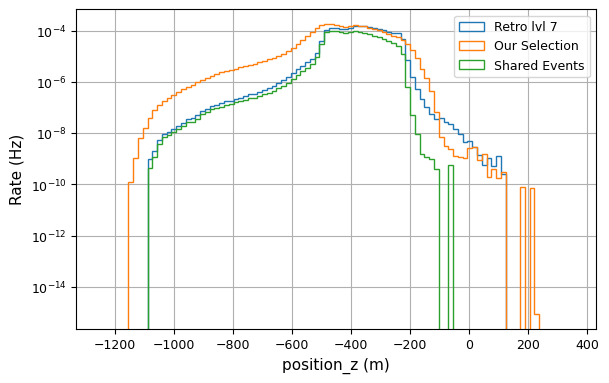

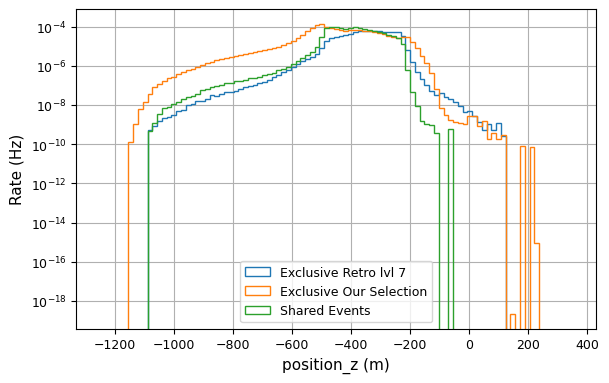

In [36]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-1250,350,100)
plt.hist(np.clip(positions_MC['position_z'][positions_MC['event_no'].isin(retro['event_no'].to_list())],-1200,300),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(retro['event_no'].to_list())],label='Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_z'][positions_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],-1200,300),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())],label='Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_z'][positions_MC['event_no'].isin(same['event_no'].to_list())],-1200,300),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_z (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posz.png', format='png', bbox_inches='tight')

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1.2))
bins=np.linspace(-1250,350,100)
plt.hist(np.clip(positions_MC['position_z'][positions_MC['event_no'].isin(only_retro_event_nos.to_list())],-1200,300),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(only_retro_event_nos.to_list())],label='Exclusive Retro lvl 7',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_z'][positions_MC['event_no'].isin(only_our_selection_event_nos.to_list())],-1200,300),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(only_our_selection_event_nos.to_list())],label='Exclusive Our Selection',bins=bins,alpha=1,histtype='step')
plt.hist(np.clip(positions_MC['position_z'][positions_MC['event_no'].isin(same['event_no'].to_list())],-1200,300),weights=positions_MC['osc_weight'][positions_MC['event_no'].isin(same['event_no'].to_list())],label='Shared Events',bins=bins,alpha=1,histtype='step')

axs.set_ylabel('Rate (Hz)')
axs.set_xlabel('position_z (m)')
axs.set_yscale('log')
#axs.set_xlim(right=20)
#axs.set_ylim(top=100)
axs.legend()
axs.grid(True)
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/MC_results_vs_retro/Selection_samples_comparison/"
fig.savefig(outdir+ 'MC_vs_retro_selection_posz_exclusive.png', format='png', bbox_inches='tight')

In [37]:
print(np.sum(positions_MC['osc_weight'][positions_MC['event_no'].isin(retro['event_no'].to_list())]))
print(np.sum(positions_MC['osc_weight'][positions_MC['event_no'].isin(pure_selection_MC_neutrinos.to_list())]))
print(np.sum(positions_MC['osc_weight'][positions_MC['event_no'].isin(same['event_no'].to_list())]))

0.002018927521289245
0.002825976038016856
0.0011888095683826856
